In [1]:
import pandas as pd
from matplotlib import pyplot

In [65]:
transaction_train_path = '00_data/transactions_train.csv'
articles_path = '00_data/articles.csv'
customers_path = '00_data/customers.csv'

# transaction_train_df = pd.read_csv(transaction_train_path, index_col=['customer_id', 'article_id'], parse_dates=['t_dat'])
transaction_train_df = pd.read_csv(transaction_train_path, parse_dates=['t_dat'])
articles_df = pd.read_csv()
transaction_train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


#### Number of distinct customers in this dataframe

In [29]:
distinct_customer = transaction_train_df.groupby(['customer_id']).count()
distinct_customer.reset_index()['customer_id'].count()

1362281

#### Total of sales in this dataframe

In [43]:
transactions = transaction_train_df.reset_index().groupby(['customer_id', 't_dat']).count()
transactions.reset_index()['article_id'].sum()

31788324

#### Total of sales in this dataframe

In [32]:
transaction_train_df.reset_index().article_id.count()

31788324

## Number of sells per day (in a year)

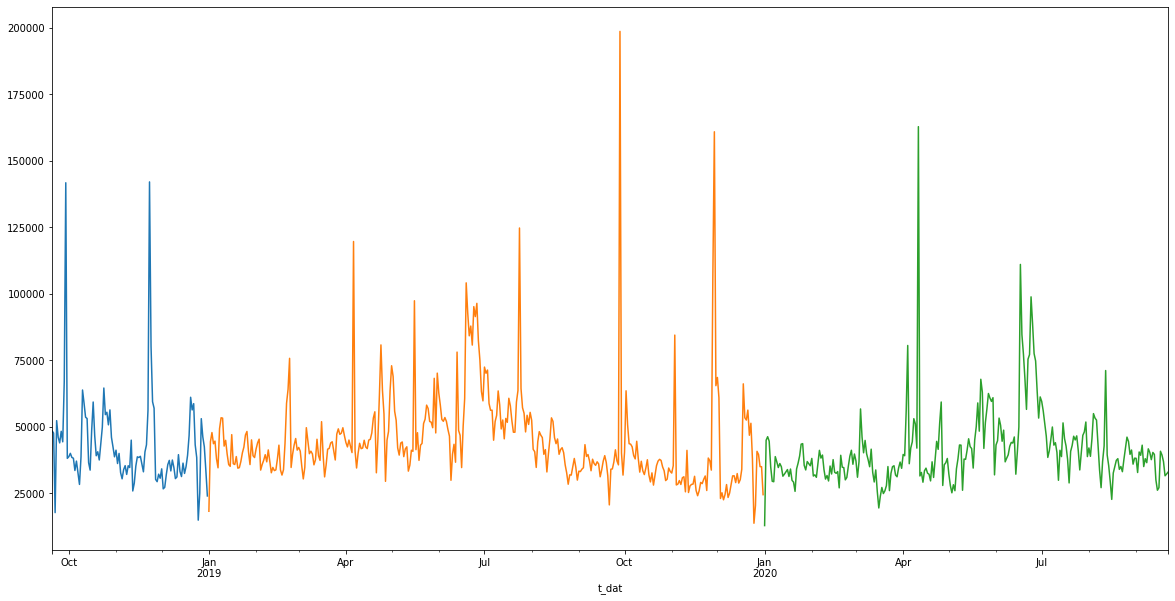

In [8]:
pyplot.figure(figsize=[20, 10])

for year in [2018, 2019, 2020]:
    sells_year = transaction_train_df[transaction_train_df['t_dat'].dt.year == year]
    sells_year = sells_year.groupby(['t_dat']).t_dat.count()
    sells_year.plot()

pyplot.show()

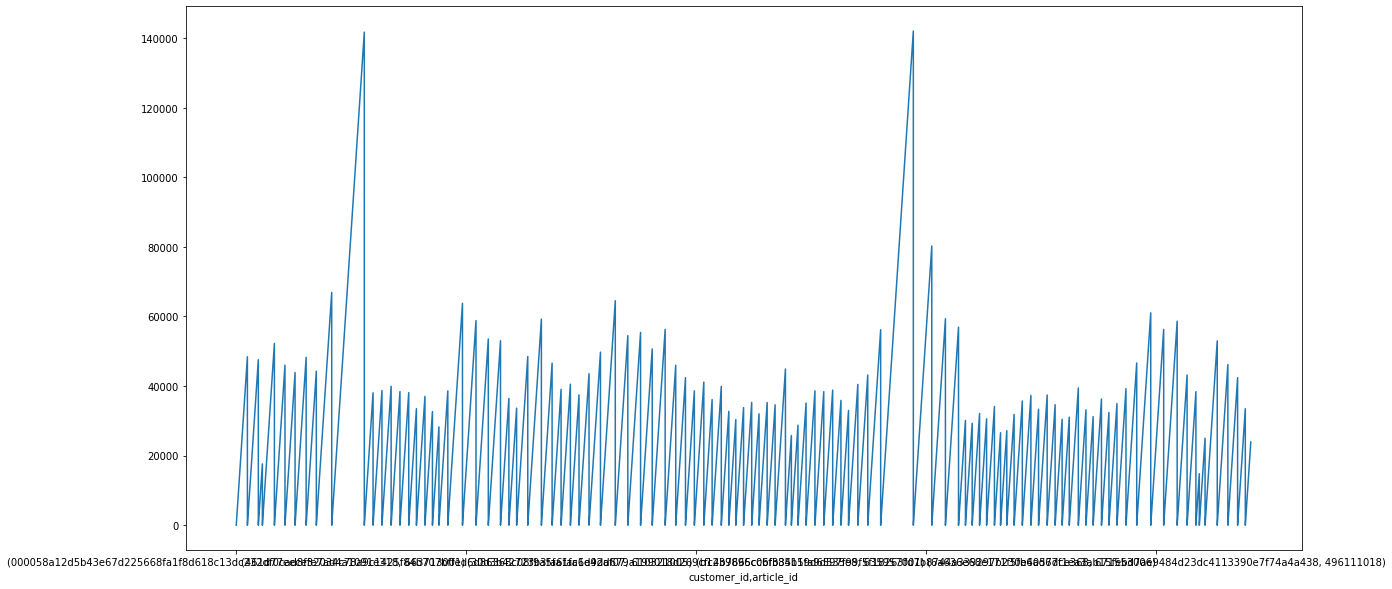

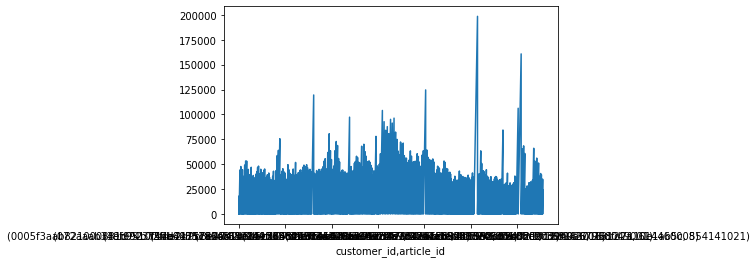

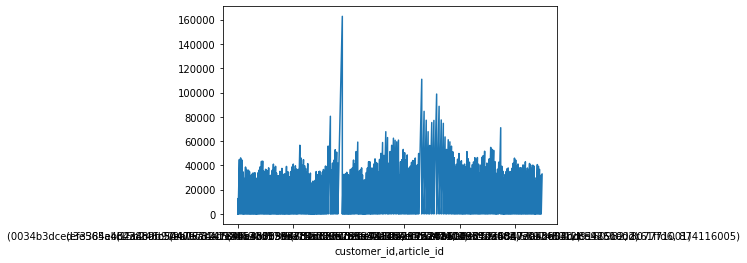

In [3]:
pyplot.figure(figsize=[20, 10])

for year in [2018, 2019, 2020]:
    sells_year = transaction_train_df[transaction_train_df['t_dat'].dt.year == year]
    sells_year = sells_year.groupby(['t_dat']).t_dat.cumcount()
    sells_year.plot()
    pyplot.show()



## Average sells per customer per year

In [42]:
result_list = []

for year in [2018, 2019, 2020]:
    sales_year = transaction_train_df[transaction_train_df['t_dat'].dt.year == year]
    sales_customer = sales_year.groupby(['customer_id']).t_dat.count()
    avg_sales_customer = sales_customer.mean()
    result_list.append({year: avg_sales_customer})

result_list

[{2018: 7.590103684534728},
 {2019: 16.78635668882403},
 {2020: 12.727282421724677}]

### Number of distinct customers 2018-09-20 _ 2018-12-31

In [25]:
sales_2018 = transaction_train_df[(transaction_train_df['t_dat'] >= '2018-09-20') &  (transaction_train_df['t_dat'] <= '2018-12-31')]
distinct_customer_2018 = sales_2018.groupby(['customer_id']).count()
distinct_customer_2018.reset_index()['customer_id'].count()

581186

In [26]:
sales_2019 = transaction_train_df[(transaction_train_df['t_dat'] >= '2019-09-20') &  (transaction_train_df['t_dat'] <= '2019-12-31')]
distinct_customer_2019 = sales_2019.groupby(['customer_id']).count()
distinct_customer_2019.reset_index()['customer_id'].count()

554594

## Try to make a time serie prediction

In [61]:
sales_year = transaction_train_df[transaction_train_df['t_dat'].dt.year < 2020]
sales_year = sales_year.groupby(['t_dat']).count().reset_index()
sales_year = sales_year[['t_dat', 'price']].rename(columns={"t_dat": "date", "price": "count"}).set_index('date')

test = transaction_train_df[(transaction_train_df['t_dat'] >= '2019-12-01') & (transaction_train_df['t_dat'] < '2019-12-31')]
test = test.groupby(['t_dat']).count().reset_index()
test = test[['t_dat', 'price']].rename(columns={"t_dat": "date", "price": "count"}).set_index('date')

,count
date,
2018-09-20,48399
2018-09-21,47543
2018-09-22,17635
2018-09-23,52230
2018-09-24,45984


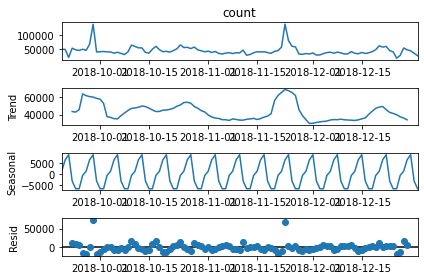

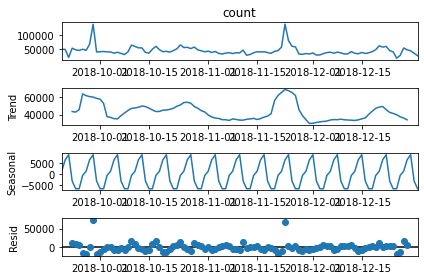

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose


results = seasonal_decompose(sales_year["count"], model="Additive")
results.plot()

In [36]:
from preparation.utils import adf_test

adf_test(sales_year)

Dicker-Fuller Test: 
ADF test               -6.319569e+00
p-value                 3.089965e-08
# lags used             0.000000e+00
# observations          1.020000e+02
critical value (1%)    -3.496149e+00
critical value (5%)    -2.890321e+00
critical value (10%)   -2.582122e+00
****************************************************************************************************
Data has no unit root and is stationnary


In [37]:
from pmdarima import auto_arima

result = auto_arima(sales_year["count"], seasonal=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2311.500, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2293.516, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2295.830, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2507.558, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2295.495, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2295.498, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2297.478, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2323.881, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.269 seconds


In [50]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sales_year["count"], order=(1,0,0))

result = model.fit()

start = len(sales_year)
end = len(sales_year)-1

pred = result.predict(start=400, end=500, typ="levels", dynamic=False).rename("Predictions")

<AxesSubplot:xlabel='date'>

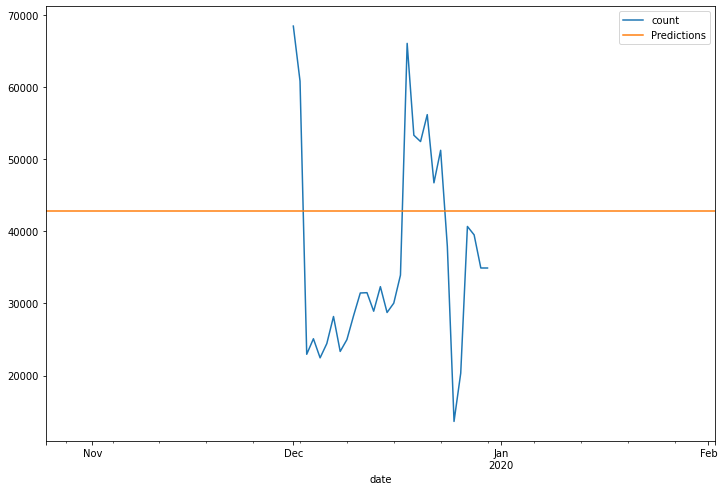

In [44]:
test['count'].plot(figsize=(12,8),legend=True)
pred.plot(legend=True)

In [40]:
len(sales_year)

103

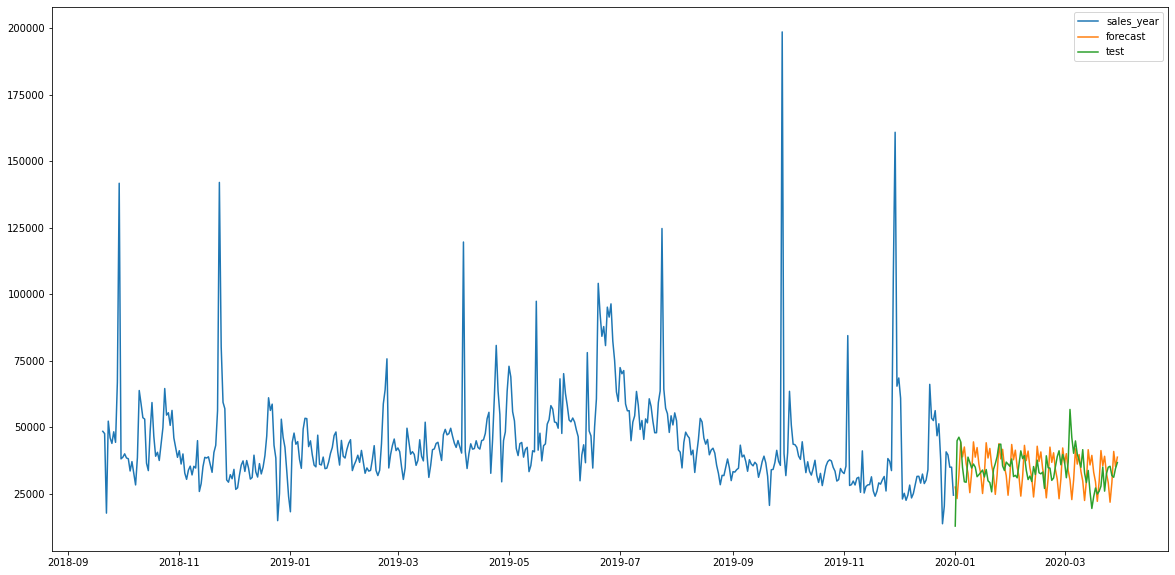

In [65]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast


test = test = transaction_train_df[(transaction_train_df['t_dat'] >= '2020-01-01') & (transaction_train_df['t_dat'] < '2020-03-31')]
test = test.groupby(['t_dat']).count().reset_index()
test = test[['t_dat', 'price']].rename(columns={"t_dat": "date", "price": "count"}).set_index('date')

sales_year.index.freq = sales_year.index.inferred_freq

stlf = STLForecast(sales_year, ARIMA, model_kwargs=dict(order=(1, 1, 1), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(90)
plt.figure(figsize=[20, 10])
plt.plot(sales_year, label="sales_year")
plt.plot(forecast, label="forecast")
plt.plot(test, label="test")
plt.legend()
plt.show()

## Count per month

In [96]:
from preparation.utils import add_year_month_column


transaction_train_df_month = add_year_month_column(transaction_train_df, "t_dat")
#sales_month_count = transaction_train_df_month.groupby(["year_month"]).year_month.count()


<AxesSubplot:xlabel='year_month'>

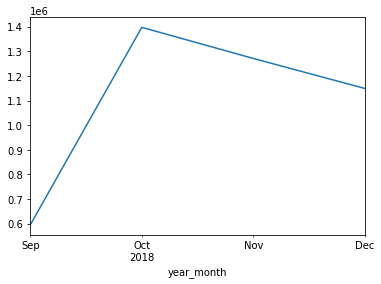

In [95]:
transaction_train_df_month["year_month"] = pd.to_datetime(transaction_train_df_month["year_month"], format="%Y-%m")

sales_year = transaction_train_df_month[transaction_train_df_month['year_month'].dt.year == 2018]
sales_year = sales_year.groupby(['year_month']).t_dat.count()
sales_year.plot()


2018
year_month
2018-09-01     594776
2018-10-01    1397040
2018-11-01    1270619
2018-12-01    1148827
Name: year_month, dtype: int64
2019
year_month
2019-01-01    1263471
2019-02-01    1152412
2019-03-01    1286750
2019-04-01    1476454
2019-05-01    1560319
2019-06-01    1906202
2019-07-01    1807494
2019-08-01    1253530
2019-09-01    1227178
2019-10-01    1146772
2019-11-01    1198033
2019-12-01    1118315
Name: year_month, dtype: int64
2020
year_month
2020-01-01    1076354
2020-02-01    1001859
2020-03-01    1047752
2020-04-01    1340882
2020-05-01    1361815
2020-06-01    1764507
2020-07-01    1351502
2020-08-01    1237192
2020-09-01     798269
Name: year_month, dtype: int64


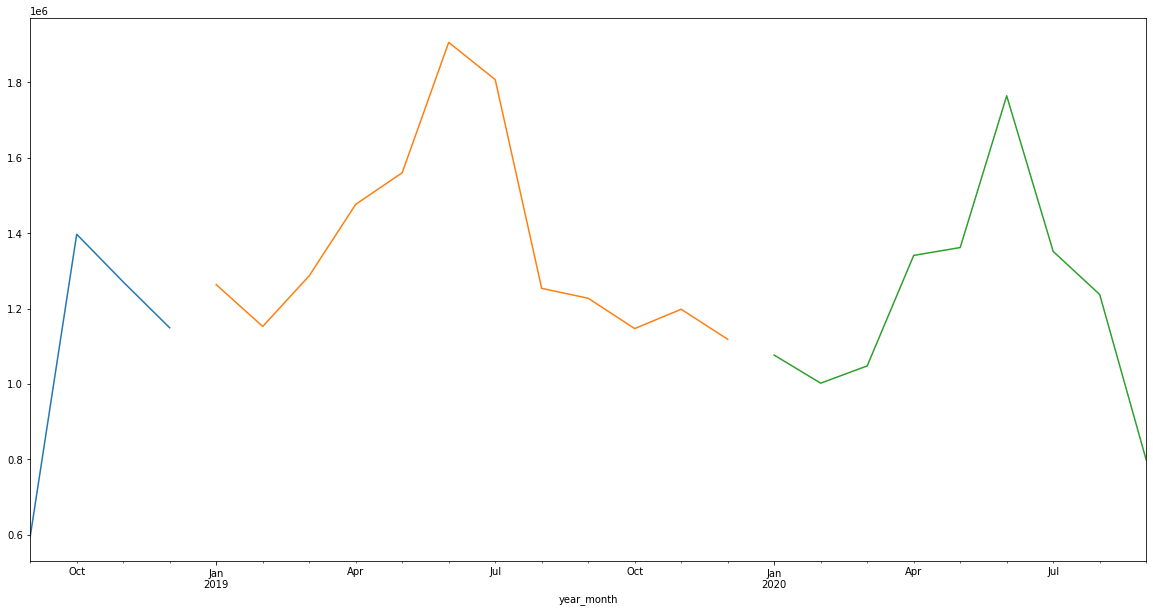

In [98]:
transaction_train_df_month["year_month"] = pd.to_datetime(transaction_train_df_month["year_month"], format="%Y-%m")

pyplot.figure(figsize=[20, 10])

for year in [2018, 2019, 2020]:
    sales_year = transaction_train_df_month[transaction_train_df_month['year_month'].dt.year == year]
    sales_year = sales_year.groupby(['year_month']).year_month.count()
    print(year)
    print(sales_year)
    sales_year.plot()

pyplot.show()

## Analyze by customer

In [64]:
transaction_train_df.reset_index()
transaction_train_df
# transaction_train_df[transaction_train_df['customer_id'] in ["000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318"]] 

t_dat  \
customer_id                                        article_id              
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... 663713001  2018-09-20   
                                                   541518023  2018-09-20   
00007d2de826758b65a93dd24ce629ed66842531df66993... 505221004  2018-09-20   
                                                   685687003  2018-09-20   
                                                   685687004  2018-09-20   
...                                                                  ...   
fff2282977442e327b45d8c89afde25617d00124d0f9998... 929511001  2020-09-22   
                                                   891322004  2020-09-22   
fff380805474b287b05cb2a7507b9a013482f7dd0bce0e6... 918325001  2020-09-22   
fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e59... 833459002  2020-09-22   
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e... 898573003  2020-09-22   

                                                                  price  \
customer_id                                        article_id             
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... 663713001   0.050831   
                                                   541518023   0.030492   
00007d2de826758b65a93dd24ce629ed66842531df66993... 505221004   0.015237   
                                                   685687003   0.016932   
                                                   685687004   0.016932   
...                                                                 ...   
fff2282977442e327b45d8c89afde25617d00124d0f9998... 929511001   0.059305   
                                                   891322004   0.042356   
fff380805474b287b05cb2a7507b9a013482f7dd0bce0e6... 918325001   0.043203   
fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e59... 833459002   0.006763   
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e... 898573003   0.033881   

                                                               sales_channel_id  \
customer_id                                        article_id                     
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... 663713001                  2   
                                                   541518023                  2   
00007d2de826758b65a93dd24ce629ed66842531df66993... 505221004                  2   
                                                   685687003                  2   
                                                   685687004                  2   
...                                                                         ...   
fff2282977442e327b45d8c89afde25617d00124d0f9998... 929511001                  2   
                                                   891322004                  2   
fff380805474b287b05cb2a7507b9a013482f7dd0bce0e6... 918325001                  1   
fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e59... 833459002                  1   
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e... 898573003                  2   

                                                               month  \
customer_id                                        article_id          
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad... 663713001       9   
                                                   541518023       9   
00007d2de826758b65a93dd24ce629ed66842531df66993... 505221004       9   
                                                   685687003       9   
                                                   685687004       9   
...                                                              ...   
fff2282977442e327b45d8c89afde25617d00124d0f9998... 929511001       9   
                                                   891322004       9   
fff380805474b287b05cb2a7507b9a013482f7dd0bce0e6... 918325001       9   
fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e59... 833459002       9   
fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20e... 898573003       9   

                                                              year_month  
customer_i